In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from myModels.knn import KNNModel
from myModels.logistic_regrassion import LogisticRegrassion
from myModels.svm import SVM
from myModels.naive_bayes import NaiveBayes
from myModels.linear_regression import LinearRegression
from sklearn.metrics import classification_report

names = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist',
    'class'
]

df = pd.read_csv('magic04.data', names=names)
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [2]:
train, test = np.split(df.sample(frac=1), [int(0.8 * len(df)), ])

def scaledataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y) # type: ignore

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [3]:
train, X_train, y_train = scaledataset(train, oversample=True)
test, X_test, y_test = scaledataset(test, oversample=False)

In [4]:
# knn_model = KNNModel(k=3)
# knn_model.fit(X_train, y_train)


In [5]:
# y_pred = knn_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [6]:
lg_model = LogisticRegrassion(lr=0.005)
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71      1357
           1       0.86      0.78      0.82      2447

    accuracy                           0.78      3804
   macro avg       0.76      0.78      0.76      3804
weighted avg       0.79      0.78      0.78      3804



In [7]:
svm_model = SVM()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      1357
           1       0.80      0.80      0.80      2447

    accuracy                           0.74      3804
   macro avg       0.72      0.72      0.72      3804
weighted avg       0.74      0.74      0.74      3804



In [9]:
prob_model = NaiveBayes()
prob_model.fit(X_train, y_train)
y_pred = prob_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.37      0.48      1357
           1       0.72      0.90      0.80      2447

    accuracy                           0.71      3804
   macro avg       0.70      0.64      0.64      3804
weighted avg       0.71      0.71      0.69      3804



In [10]:
# for label in df.columns[1:]:
#     plt.scatter(df[label], df['fLength'])
#     plt.title(label)
#     plt.ylabel('fLength')
#     plt.xlabel(label)
#     plt.show()

df_for_regrassion = df[['fAlpha', 'fDist', 'fLength']]
df_for_regrassion.head()

,fAlpha,fDist,fLength
0,40.0920,81.8828,28.7967
1,6.3609,205.2610,31.6036
2,76.9600,256.7880,162.0520
3,10.4490,116.7370,23.8172
4,4.6480,356.4620,75.1362


In [11]:
import copy
from sklearn.linear_model import LinearRegression as SKLinearRegression

train, test = np.split(df_for_regrassion.sample(frac=1), [int(0.8 * len(df_for_regrassion)), ])

def get_xy(dataframe, y_label, x_label = None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        X = dataframe[
              [c for c in dataframe.columns if c != y_label]
            ].values
    elif len(x_label) == 1:
        X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
        X = dataframe[x_label].values

    y = dataframe[y_label].values
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

_, X_train_1Param, y_train_1Param = get_xy(train, 'fDist', ['fLength'])
_, X_test_1Param, y_test_1Param = get_xy(test, 'fDist', ['fLength'])


oneParam_reg = SKLinearRegression()
oneParam_reg.fit(X_train_1Param, y_train_1Param)
oneParam_reg.score(X_test_1Param, y_test_1Param)

0.18242650675879946

In [12]:
_, X_train_all, y_train_all = get_xy(train, 'fDist', ['fAlpha', 'fLength'])
_, X_test_all, y_test_all = get_xy(test, 'fDist', ['fAlpha', 'fLength'])

all_reg = SKLinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all)

0.23408737598925333

In [13]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [14]:
oneParam_reg = LinearRegression()
oneParam_reg.fit(X_train_1Param, y_train_1Param)
oneParam_reg.score(X_test_1Param, y_test_1Param)

0.18288556132192713

In [15]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all)

0.23414702531549714

In [16]:
y_pred = oneParam_reg.predict(X_test_1Param)
MSE(y_pred, y_test_1Param)

4482.770318633278

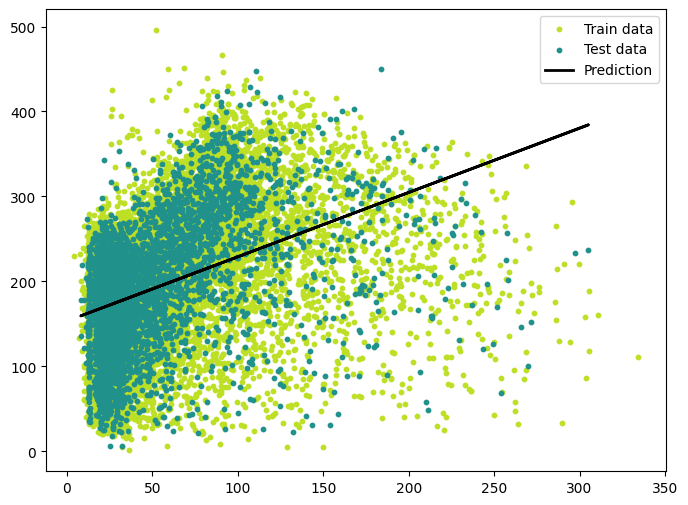

In [17]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train_1Param, y_train_1Param, color=cmap(0.9), s=10, label="Train data")
m2 = plt.scatter(X_test_1Param, y_test_1Param, color=cmap(0.5), s=10, label="Test data")
plt.plot(X_test_1Param, y_pred, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()